# $Hw 6$

By ShineHale(yunsong Yang) U202115980

This part we will deep into the linear algebra model, which is used in everything we encounter, like the recommendation system, electronical system and so on.

First of all, we need to import the related library we will rely on which is going through all the lab.

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy.linalg as npl

import pandas as pd

%matplotlib inline

## Experiment 1

1. Use SVD to compress the binary image of the attached chess record, and observe the effect of SVD compression to restore the image.
2. Add random noise by yourself to observe the effect of SVD compression and restored image

### problem 1
The steps for solving the problem one is 
- read the image from the file as an array.
- make the SVD operations and decompress the data
- show the image we've decompressed

the shape of image array: (810, 806)


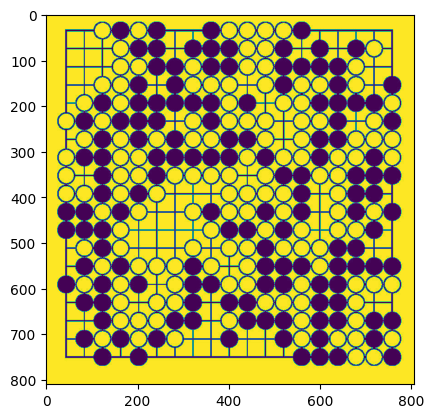

In [9]:
# read the image
I = mpimg.imread('./go.jpg')
plt.imshow(I)
print('the shape of image array:', I.shape)

In [10]:
# make the SVD operations
print('-----------------------------------------\nAfter the SVD:')
U, s, V = npl.svd(I)
print(V.shape)
filter_array = np.where(s > 1e3, 1, 0)
k = np.sum(filter_array)
U_store = U.T[:k].T
s_store = s[:k]
V_store = V[:k]
print('the shape of U: ', U_store.shape, 'the shape of s: ', s_store.shape)
print('the shape of V: ', V_store.shape)
I_svd = np.dot(np.dot(U_store, np.diag(s_store)), V_store)

-----------------------------------------
After the SVD:
(806, 806)
the shape of U:  (810, 167) the shape of s:  (167,)
the shape of V:  (167, 806)


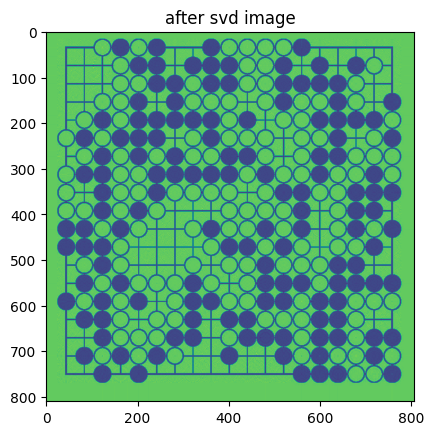

In [11]:
# show the image after compress and decompress
plt.title("after svd image")
plt.imshow(I_svd)
plt.show()

from the result we have make, we can easily find that the image does not change a lot, but the store has decrease a lot to $(810 + 806) * 517 + 517 = 270039$ comparing to $810 * 806 = 652860$, it means we only need about $40\%$ space to conserve the image.

### problem 2
The steps for solving the problem 2 is
- add some noises into the image
- repeat the same steps in the problem 1, but we select the target k we wanna

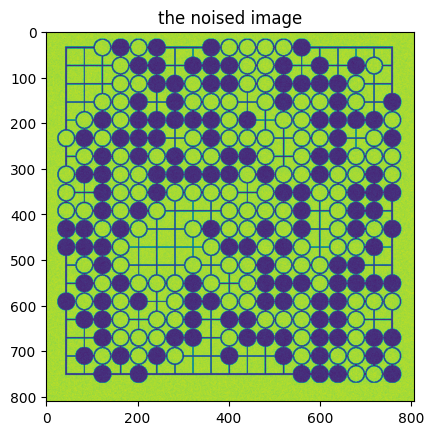

In [12]:
# add some Gaussian noises to the image
mean = 0
std = 10

noise = np.random.normal(mean, std, I.shape)
noised_I = I + noise

plt.title("the noised image")
plt.imshow(noised_I)
plt.show()

In [13]:
U, s, V = npl.svd(noised_I)
k = 600
U_store = U.T[:k].T
s_store = s[:k]
V_store = V[:k]
print('the shape of U: ', U_store.shape, 'the shape of s: ', s_store.shape)
print('the shape of V: ', V_store.shape)
noised_I_svd = np.dot(np.dot(U_store, np.diag(s_store)), V_store)

the shape of U:  (810, 600) the shape of s:  (600,)
the shape of V:  (600, 806)


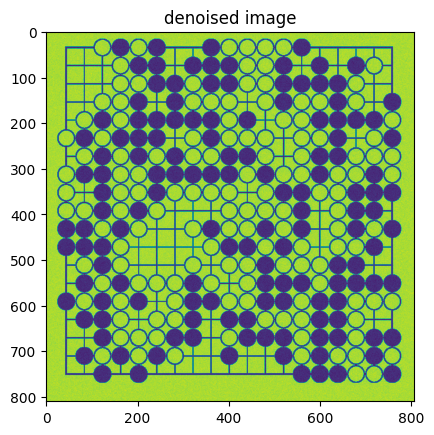

In [14]:
plt.title("denoised image")
plt.imshow(noised_I_svd)
plt.show()

From the plot, we can have the view that the figure has been clear a little.